# [95-865] Unstructured Data Analysis: Final Exam Q2

Name:  
Andrew ID:

Before getting started: Put the attached file __*cnn_model.h5*__ in the same directory as this notebook.

# Q2: Bottleneck layer [Total: 75 points]

Recall from lecture the "crumpled paper analogy": in a neural net, as you progress through the layers from input to output, the layers should be "unfolding the original space" to disentangle the classes. When you get to the layer before the classifier, you should've changed the data representation into something that makes classification easy. We will refer to the layer before the classifier in the neural net as the bottleneck layer. 

In this problem, you will be using an output of a bottleneck layer from pre-trained CNN as input features for a few simple classifiers. The CNN provided was trained with the Fashion MNIST dataset which consists of 10 classes of 28x28 grayscale images.

In [95]:
from keras.datasets import fashion_mnist
from keras.models import load_model
from keras.models import Model
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Data exploration

Load the Fashion MNIST dataset and check how it looks like.

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


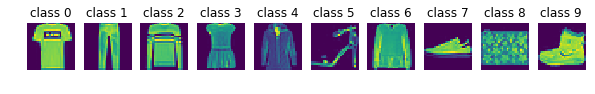

In [96]:
# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
_, x_img, y_img = x_train.shape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# See how the images look like
labels = np.unique(y_train)
f, axarr = plt.subplots(1, 10, figsize=(10, 10))
for l in labels:
    idx = np.argwhere(y_train==l)[0][0]
    img = x_train[idx]
    axarr[l].imshow(img)
    axarr[l].set_title('class '+str(l))
    axarr[l].axis('off')

### Loading pre-trained CNN

Before loading the pre-trained model, you should reshape the data to make it fit the Keras structure.

In [125]:
num_classes = 10

# reshape the data into a 4D tensor: (sample_number, x_img_size, y_img_size, num_channels)
# because the fashion MNIST is greyscale, we only have a single channel
x_train = x_train.reshape(x_train.shape[0], x_img, y_img, 1)
x_test = x_test.reshape(x_test.shape[0], x_img, y_img, 1)

# convert the data to the right type
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class vectors to binary class matrices - 
# this should be used for Keras functions
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

<h3><font color='blue'>(a) [5 points]</font></h3>

Select train and test data that belong to classes 2 (corresponding to pullovers) and 6 (corresponding to fancier shirts than t-shirts; note: class 0 corresponds to t-shirts), i.e., subsample all the data that has label 2 or 6. Save  the variables with the same names as before (`x_train`, `x_test`, `y_train`, `y_test`, `y_train_c`, `y_test_c`). From now on, we are only dealing with the images that are in classes 2 (pullovers) and 6 (shirts).

In [126]:
# write your code here

#bool_train = y_train == (2 or 6)
#bool_test = y_test[(1 == 2) or (x == 6)]
bool_train = np.logical_or(y_train==2, y_train==6)
bool_test = np.logical_or(y_test==2, y_test==6)


y_test = y_test[bool_test]
x_train = x_train[bool_train] 
x_test = x_test[bool_test]
y_train = y_train[bool_train] 
y_test = y_test[bool_test]
y_train_c = y_train_c[bool_train]
y_test_c = y_test_c[bool_test]




2000
12000
12000
2000


In [127]:
print(x_train.shape, y_train.shape, y_train_c.shape)
print(x_test.shape, y_test.shape, y_test_c.shape)

(12000, 28, 28, 1) (12000,) (12000, 10)
(2000, 28, 28, 1) (2000,) (2000, 10)


<h3><font color='blue'>(b) [5 points]</font></h3>

Reduce the size of train dataset for later use. Randomly subsample 100 samples from `x_train`. Shrink the size of `y_train` accordingly. 

In [147]:
# write your code here


indices = np.random.randint(0,x_train.shape[0], 100)

x_train = x_train[indices]
y_train = y_train[indices]



We are ready to load the pre-trained model. The pre-trained CNN contains a dense layer with output size 20 which is regarded as a bottleneck layer. Let's call the output vector of this layer the bottleneck feature vector. Furthermore, this model was pre-trained using the entire training dataset which consists 60,000 samples. While training with mini-batch scheme, it only iterated for 5 epochs, so the model might not show the highest performance.

In [148]:
# load the pre-trained CNN
model = load_model('./cnn_model.h5')
print('<Summary of the pre-trained CNN>')
model.summary()

# select the pretrained CNN upto the bottleneck layer
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
print('<Summary of the pre-trained CNN up to the bottleneck layer>')
intermediate_layer_model.summary()

<Summary of the pre-trained CNN>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
bottleneck (Dense)           (None, 20)                92180     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 96,122
Trainable params: 96,122
Non-trainable params: 0
_______________________________________

<h3><font color='blue'>(c) [5 points]</font></h3>

Extract bottleneck feature vectors of the train and test data from the intermediate model (_hint_: the neural net contained in `intermediate_layer_model` has an output that is precisely the bottleneck feature vector, so to figure out what the bottleneck feature vector is for any data point, you would simply use the `predict` function of `intermediate_layer_model`). Print the shapes of bottleneck features extracted from train and test data by using the `.shape` command.

In [151]:
# write your code here
print(intermediate_layer_model.predict(x_train).shape)
print(intermediate_layer_model.predict(x_test).shape)

(100, 20)
(2000, 20)


<h3><font color='blue'>(d) Visualization [10 points]</font></h3>

Visualize two different types of features using t-SNE. Use **784 (=28$\times$28) dimensional raw features** and **20 dimensional bottleneck features** from **test data** (one plot each). Set `n_components=2, verbose=1, perplexity=40` for `TSNE` from scikit-learn.

In [152]:
from sklearn.manifold import TSNE


ImportError: cannot import name 'NUMPY_MKL'

<h3><font color='blue'>(e) Test accuracy comparison [20 points]</font></h3>

Train **1-NN**, **random forest** and **linear SVM** classifiers with **784 (=28$\times$28) raw features** and **20 bottleneck features** from **train data** repectively. That means you should train 6 models in total. Test each model with corresponding **test dataset** and print the test accuracy. For model training, use default parameters if not specified. 
Also, compute and print the test accuracy of **pretrained CNN** (`model`) by using **test data**. You may think of this task as filling in the blanks on the following table with test accuracy results.

| Model type       | Raw features        | Bottleneck features  |
|:---------------- |:-------------------:|:--------------------:|
| Pretrained CNN   |                     | this cell stays empty|
| 1-NN             |                     |                      |
| Random forest    |                     |                      |
| Linear SVM       |                     |                      |

In [ ]:
# write your code here

<h3><font color="blue">(f) [5 points]</font></h3>

Which model performed the best? Which model showed the lowest accuracy? In average, using which type of feature (raw / bottleneck) performed better? Explain the reason using the visualization result.

Write your answer here: 

<h3><font color='blue'>(g) ROC curve with varying k in k-NN [20 points]</font></h3>

Train k-NN classifiers with $k=1,2,...,50$ with **bottleneck** feature vectors of **train** data. As a result, you will get 50 classifiers. Draw a scatter plot that has false positive rate (FPR) on x-axis and true positive rate (TPR) on y-axis. Each scatter point represents one k-NN classifier. Use the **test** data to compute FPR and TPR.

Recall that true and false positive rate calculations require you to specify one of the two outcomes as the "positive" class and the other as the "negative" class. For this problem, use class 6 (shirts) as the "positive" class, and class 2 (pullovers) as the "negative" class.

In [ ]:
# write your code here

<h3><font color="blue">(h) [5 points]</font></h3>

Suppose you work for a company that wants to figure out when a shirt appears among photos that have either shirts or pullovers. The company tells you that it cannot tolerate a false positive rate of detecting shirts that is more than 12.5%. Explain how you would choose $k$ for $k$-NN classification such that you have high true positive rate but don't have more than a 12.5% false positive rate.

Write your answer here: